# PG Program in AI ML - NITW
## Mid Program Project-1

### Background

Cab booking system is the process where renting a cab is automated through an app
throughout a city. Using this app, people can book a cab from one location to another location.
Being a cab booking app company, exploiting the understanding of cab supply and demand
could increase the efficiency of their service and enhance user experience by minimizing
waiting time.
Objective of this project is to combine historical usage pattern along with the open data sources
like weather data to forecast cab booking demand in a city.

### Process Flow

You will be provided with hourly renting data span of two years. Data is randomly divided into
train and test set. 
You must predict the total count of cabs booked in each hour covered by the
test set, using the information available prior to the booking period. 
You need to append the
train_label dataset to train.csv as ‘Total_booking’ column.

Please find the descriptions of the columns present in the dataset as below.

datetime - hourly date + timestamp

season - spring, summer, autumn, winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - Clear , Cloudy, Light Rain, Heavy temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

Total_booking - number of total booking

#### Task1:
1. Visualize data using different visualizations to generate interesting insights.
2. Outlier Analysis
3. Missing value analysis
4. Visualizing Total_booking Vs other features to generate insights
5. Correlation Analysis

#### Task2:
1. Feature Engineering
2. Grid search
3. Regression Analysis
4. Ensemble Model

### Solution:

#### Load and Analyse the Data

In [145]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [146]:
#Load the training data
train_data = pd.read_csv('Dataset/train.csv')
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [147]:
#Load the train_label data
train_label = pd.read_csv('Dataset/train_label.csv', header=None, names=['Total_booking'])
train_label.head()

,Total_booking
0,504
1,5
2,139
3,209
4,184


In [148]:
#Verify and append the train_label to training data
print(train_data.shape, train_label.shape)
train_data['Total_booking'] = train_label['Total_booking']
print(train_data.shape)
train_data.head()

(8708, 9) (8708, 1)
(8708, 10)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [149]:
#Load the testing data
test_data = pd.read_csv('Dataset/test.csv')
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [150]:
#Load the test_label data
test_label = pd.read_csv('Dataset/test_label.csv', header=None, names=['Total_booking'])
test_label.head()

,Total_booking
0,256
1,87
2,11
3,84
4,668


In [151]:
#Format the datetime in train and test data
train_data['datetime'] = pd.to_datetime(train_data['datetime'], format='%m/%d/%Y %H:%M')
print(train_data['datetime'].dtype)
train_data.head()

datetime64[ns]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [152]:
test_data['datetime'] = pd.to_datetime(test_data['datetime'], format='%m/%d/%Y %H:%M')
print(test_data['datetime'].dtype)
test_data.head()

datetime64[ns]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2012-05-10 11:00:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,2012-06-09 07:00:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,2011-03-06 20:00:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,2011-10-13 11:00:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,2012-06-02 12:00:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [153]:
#combine the test data variables and label
test_data['Total_booking'] = test_label['Total_booking']
print(test_data.shape)
test_data.head()

(2178, 10)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,2012-05-10 11:00:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,2012-06-09 07:00:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,2011-03-06 20:00:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,2011-10-13 11:00:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,2012-06-02 12:00:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


In [154]:
#For preprocessing, let us combine train and test data with a source column to differentiate and separate the data later.
train_data['source'] = 'train'
test_data['source'] = 'test'
main_data = pd.concat([train_data, test_data], ignore_index = True)
print(main_data.shape)
main_data.head()

(10886, 11)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,source
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,train
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,train
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,train
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,train
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,train


In [155]:
#Check null values and analyse the data
print(main_data.isnull().sum())

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
source           0
dtype: int64


In [156]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
datetime         10886 non-null datetime64[ns]
season           10886 non-null object
holiday          10886 non-null int64
workingday       10886 non-null int64
weather          10886 non-null object
temp             10886 non-null float64
atemp            10886 non-null float64
humidity         10886 non-null int64
windspeed        10886 non-null float64
Total_booking    10886 non-null int64
source           10886 non-null object
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 935.6+ KB


In [157]:
main_data.dtypes

datetime         datetime64[ns]
season                   object
holiday                   int64
workingday                int64
weather                  object
temp                    float64
atemp                   float64
humidity                  int64
windspeed               float64
Total_booking             int64
source                   object
dtype: object

In [158]:
main_data.nunique()

datetime         10886
season               4
holiday              2
workingday           2
weather              4
temp                49
atemp               60
humidity            89
windspeed           28
Total_booking      822
source               2
dtype: int64

In [159]:
#Let us convert the columns season, holiday, workingday and weather to Categorical datatype as they are not numerical data
main_data.iloc[:,1:5] = main_data.iloc[:,1:5].astype('category')
main_data.iloc[:,1:5].dtypes

season        category
holiday       category
workingday    category
weather       category
dtype: object

In [160]:
#Checking the data spread and central tendancy
main_data.describe()

,temp,atemp,humidity,windspeed,Total_booking
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,191.574132
std,7.79159,8.474601,19.245033,8.164537,181.144454
min,0.82000,0.760000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,42.000000
50%,20.50000,24.240000,62.000000,12.998000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,284.000000
max,41.00000,45.455000,100.000000,56.996900,977.000000


###### Observations: 
* The training data consists of 8708 instances and 10 features after combining with train_label data.
* The test data consists of 2178 instances and 10 features after combining with test_label data.
* Features:
    * Categorical: season, holiday, workingday, weather (even though holiday and workingday are in numbers, they are categorical as they just indicate True or False).
    * Numerical: temp, atemp, humidity, windspeed, Total_booking
* We need to encode the categorical features as we can't train our model on Categorical values.
* There are no null values in the training and test datasets.

#### 1.1: Visualize data using different visualizations to generate interesting insights.

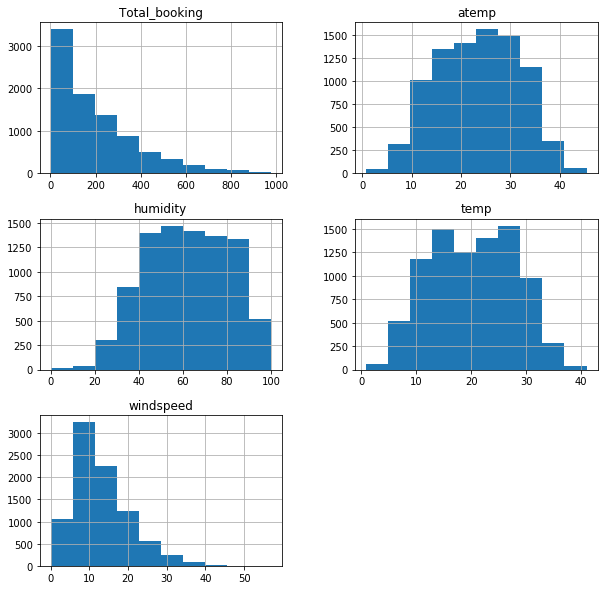

In [161]:
#plot the distribution of numerical features in training data
train_data.iloc[:,5:].hist(figsize=(10,10))
plt.show()

###### Observation:
* From the above visualization, we can see all numerical features follow Gaussian distribution except windspeed and Total_booking.
* Windspeed and Total_booking are skewed indicating presence of Outliers. We will verify and treat the outliers in upcoming steps.

In [162]:
#visualizing the categorical features using pie charts
fig = plt.figure(figsize=(12,10), dpi=1600)
ax1 = plt.subplot2grid((2,2), (0,0))
plt.pie(train_data['holiday'].value_counts(), labels = train_data['holiday'].unique(), 
        colors = ['#FA8F0A','#F0DA32','#3594FF','#8B5A8C'], autopct='%1.1f%%', startangle=75)
plt.title('Holidays')

ax1 = plt.subplot2grid((2,2), (0,1))
plt.pie(train_data['workingday'].value_counts(), labels = train_data['workingday'].unique(), 
        colors = ['#FA8F0A','#F0DA32','#3594FF','#8B5A8C'], autopct='%1.1f%%', startangle=75)
plt.title('Workingdays')

ax1 = plt.subplot2grid((2,2), (1,0))
plt.pie(train_data['season'].value_counts(), labels = train_data['season'].unique(), 
        colors = ['#FA8F0A','#F0DA32','#3594FF','#8B5A8C'], autopct='%1.1f%%', startangle=75)
plt.title('Season')

ax1 = plt.subplot2grid((2,2), (1,1))
plt.pie(train_data['weather'].value_counts(), labels = train_data['weather'].unique(), 
        colors = ['#FA8F0A','#F0DA32','#3594FF','#8B5A8C'], autopct='%1.0f%%', startangle=75)
plt.title('Weather')

plt.show()



###### Observations:
* From the Holidays and Workingdays plot we can see concentration of Holidays, which is evident because the Holidays will be less in reality.
* From Season plot, we see the frequency of all the seasons is reasonably balanced in the dataset.
* From Weather plot, it is evident that clear+few clouds are maximum and Heavy rain+thunderstorm category is less.

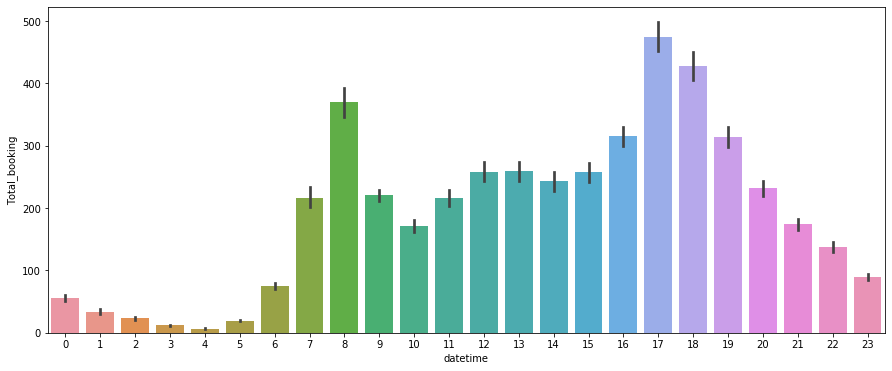

In [163]:
#let us see the hourly booking trend in training data
fig1 = plt.figure(figsize = (15,6))
sns.barplot(x = train_data['datetime'].dt.hour, y = train_data['Total_booking'])

###### Observations:
* We can see high bookings around 8 to 9 AM and 4 to 6 PM which are peak hours due to office timings. Bookings during the day time from 10 AM to 3 PM range between 200 to 300.
* We can see gradual decrease in bookings from 10 PM till morning 4 AM which are ofcourse the commonly less commuted hours.

#### 1.2: Outlier Analysis
    Let us check for Outliers in all columns using box plot.
    If there are outliers, clip them, lower limit will be Q1-1.5*IQR and upper limit will be Q3+1.5*IQR.
    Q1 = 1st Quartile (25%)
    Q3 = 3rd Quartile (75%)
    IQR = Inter-quartile range (Q3-Q1)

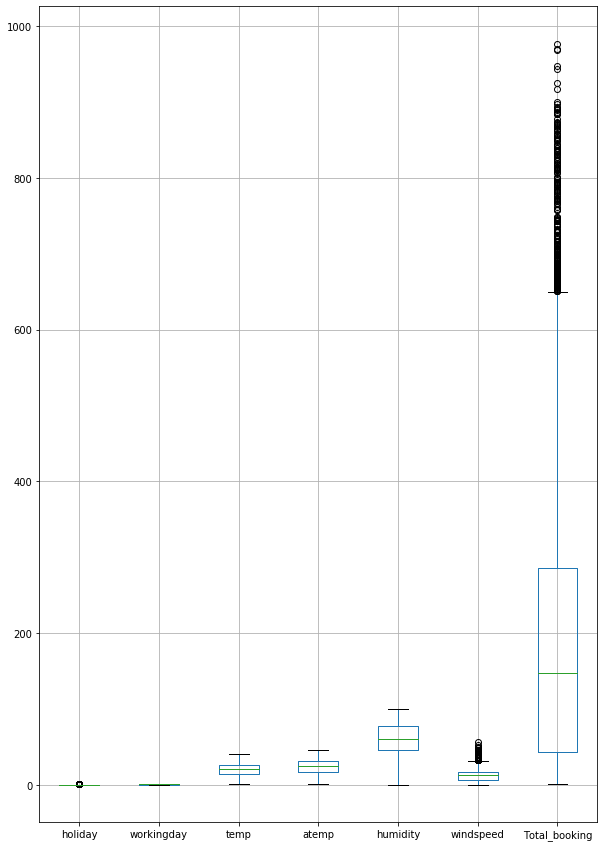

In [164]:
train_data.boxplot(figsize = (10,15))
plt.show()

We can see windspeed and Total_booking have several outliers. Let us treat the outlier values by clipping.

In [165]:
for col in ['windspeed', 'Total_booking']:
    q1 = train_data[col].quantile(.25)
    q3 = train_data[col].quantile(.75)
    IQR = q3-q1
    train_data[col] = np.clip(train_data[col], q1-1.5*IQR, q3+1.5*IQR)

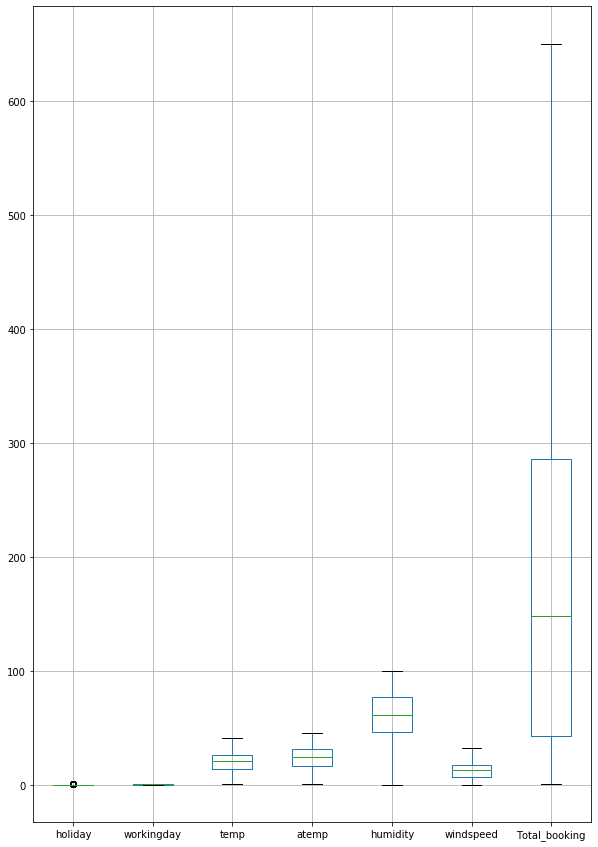

In [166]:
train_data.boxplot(figsize = (10,15))
plt.show()

The outlier values have been clipped by using numpy clip function with lower limit = q1-1.5 * IQR and upper limit = q3+1.5 * IQR

#### 1.3: Missing Value Analysis

In [167]:
#Checking the null values in the dataset
main_data.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
source           0
dtype: int64

We can see there are no missing values in the dataset and there is no need to treat missing values.

#### 1.4: Visualizing Total_booking Vs other features to generate insights

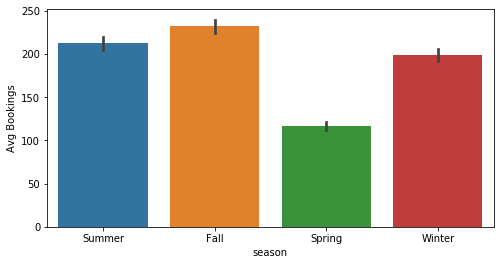

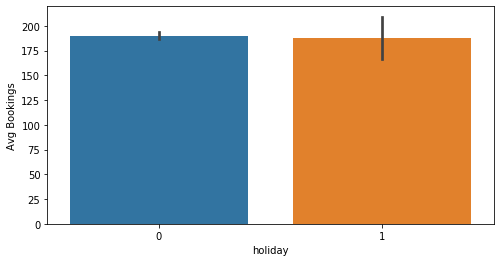

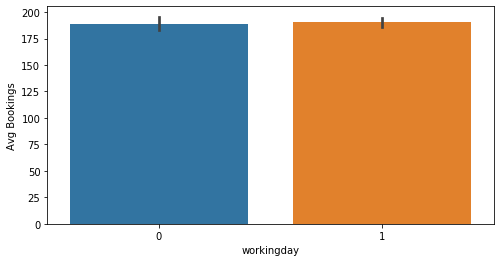

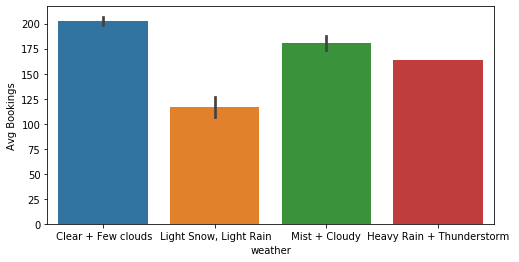

In [168]:
#Will use bar plot to visualize Total_booking vs other features
for column in ['season', 'holiday', 'workingday', 'weather']:
    fig = plt.figure(figsize=(8,4))
    sns.barplot(x = train_data[column], y = train_data['Total_booking'])
    plt.xlabel(column)
    plt.ylabel('Avg Bookings')
    plt.show()

###### Observations:
* Season: Average bookings in Spring season are less compared to other seasons. Fall season has the highest average bookings.
* Holiday and Workingday: Don't have much difference in average bookings between holiday and non-holiday, workingday and non-working day.
* Weather: Average bookings is less when there is Light Snow or Light Rain, we see highest average bookings when the weather is Clear with Few clouds.

#### 1.5: Correlation Analysis

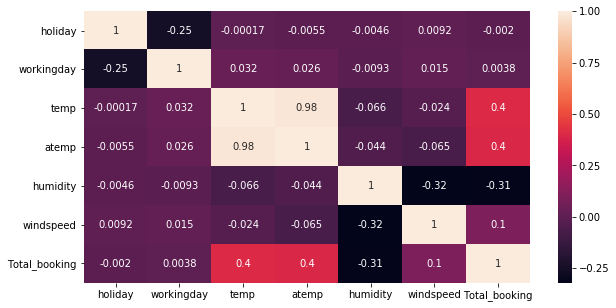

In [169]:
correlation = train_data.corr()
fig = plt.figure(figsize=(10,5))
sns.heatmap(correlation, annot=True)

* We can see temp and atemp have high correlation with each other and very good correlation with Total_booking. temp and atemp columns cam be considered as one and we can drop one of them.
* Windspeed and Humidity are negatively correlated, and humidity has negative correlation with Total_booking.

#### 2.1: Feature Engineering

In [170]:
#Extracting hour, weekday and month from datetime
main_data['hour'] = main_data['datetime'].dt.hour
main_data['weekday'] = main_data['datetime'].dt.dayofweek
main_data['month'] = main_data['datetime'].dt.month

In [171]:
#Converting the categorical features to numerical with labelEncoder
le = LabelEncoder()
for cols in ['season', 'weather', 'holiday', 'workingday']:
    main_data[cols] = le.fit_transform(main_data[cols])

In [172]:
#Dropping the temp column as per the Correlation analysis earlier
main_data.drop('temp', inplace=True, axis=1)
main_data.head()

,datetime,season,holiday,workingday,weather,atemp,humidity,windspeed,Total_booking,source,hour,weekday,month
0,2012-05-02 19:00:00,2,0,1,0,25.760,77,16.9979,504,train,19,2,5
1,2012-09-05 04:00:00,0,0,1,0,33.335,79,19.0012,5,train,4,2,9
2,2011-01-13 09:00:00,1,0,1,0,6.060,50,22.0028,139,train,9,3,1
3,2011-11-18 16:00:00,3,0,1,0,16.665,29,8.9981,209,train,16,4,11
4,2011-09-13 13:00:00,0,0,1,0,33.335,51,19.0012,184,train,13,1,9


In [176]:
#Rearranging the columns
cols = ['datetime', 'hour', 'weekday', 'month', 'season', 'holiday', 'workingday', 'weather', 'atemp', 'humidity', 
        'windspeed', 'Total_booking', 'source']
main_data = main_data[cols]
main_data.head()

,datetime,hour,weekday,month,season,holiday,workingday,weather,atemp,humidity,windspeed,Total_booking,source
0,2012-05-02 19:00:00,19,2,5,2,0,1,0,25.760,77,16.9979,504,train
1,2012-09-05 04:00:00,4,2,9,0,0,1,0,33.335,79,19.0012,5,train
2,2011-01-13 09:00:00,9,3,1,1,0,1,0,6.060,50,22.0028,139,train
3,2011-11-18 16:00:00,16,4,11,3,0,1,0,16.665,29,8.9981,209,train
4,2011-09-13 13:00:00,13,1,9,0,0,1,0,33.335,51,19.0012,184,train


In [188]:
#Preparing the train and test data
train = main_data[main_data['source']=='train']
test = main_data[main_data['source']=='test']

In [189]:
train.drop('source', axis=1, inplace=True)
test.drop('source', axis=1, inplace=True)

In [225]:
Xtrain = train.drop(['datetime', 'Total_booking'], axis=1)
ytrain = train['Total_booking']
Xtest = test.drop(['datetime', 'Total_booking'], axis=1)
ytest = test['Total_booking']

#### 2.2: Grid Search
    Performing the GridSearchCV to find the best parameters.

In [232]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [226]:
#Finding the Optimal alpha value with Grid Search for Ridge and Lasso
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
params = dict(alpha=alpha)

grid_ridge = GridSearchCV(estimator=Ridge(), param_grid=params, scoring='r2', verbose=1, n_jobs=-1)
grid_rid_result = grid_ridge.fit(Xtrain, ytrain)
print('Ridge Best Score:', grid_rid_result.best_score_)
print('Ridge Best alpha:', grid_rid_result.best_params_)

grid_lasso = GridSearchCV(estimator=Lasso(), param_grid=params, scoring='r2', verbose=1, n_jobs=-1)
grid_las_result = grid_lasso.fit(Xtrain, ytrain)
print('Lasso Best Score:', grid_las_result.best_score_)
print('Lasso Best alpha:', grid_las_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


Ridge Best Score: 0.3373409465805858
Ridge Best alpha: {'alpha': 1000}
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Lasso Best Score: 0.3372588680141632
Lasso Best alpha: {'alpha': 0.1}


In [228]:
#Finding the best parameters for Random Forest and Gradient Boosting Regressor
params = {'max_depth': [3,4,5,6,7],'min_samples_split': [3,4,5,6],'n_estimators': [500,1000,1500]}
grid_rf = GridSearchCV(RandomForestRegressor(), params, cv=5, n_jobs=-1, verbose=True)
grid_rf.fit(Xtrain, ytrain)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 14.6min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [500, 1000, 1500]},
             verbose=True)

In [229]:
grid_rf.best_params_

{'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 1000}

In [230]:
params = {'max_depth': [3,4,5,6,7],'min_samples_split': [3,4,5,6],'n_estimators': [500,1000,1500]}
grid_gb = GridSearchCV(GradientBoostingRegressor(), params, cv=5, n_jobs=-1, verbose=True)
grid_gb.fit(Xtrain, ytrain)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 18.1min finished


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [500, 1000, 1500]},
             verbose=True)

In [231]:
grid_gb.best_params_

{'max_depth': 6, 'min_samples_split': 4, 'n_estimators': 500}

#### 2.3: Regression Analysis

In [235]:
regressors = [LinearRegression(), Ridge(alpha=1000), Lasso(alpha=0.1)]
for clf in regressors:
    clf.fit(Xtrain, ytrain)
    print(clf)
    print('='*30)
    print('*****Results*****')
    ypred = clf.predict(Xtest)
    print('R2 Score:', r2_score(ytest, ypred))
    print('MSE:', mean_squared_error(ytest, ypred))
    print('MAE:', mean_absolute_error(ytest, ypred))
    print('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)))
    print('='*30)

LinearRegression()
*****Results*****
R2 Score: 0.3517007860131759
MSE: 20862.952979156595
MAE: 106.74977202941434
RMSE: 144.44013631659516
Ridge(alpha=1000)
*****Results*****
R2 Score: 0.35134094885184286
MSE: 20874.532918812663
MAE: 106.74490677010897
RMSE: 144.48021635785526
Lasso(alpha=0.1)
*****Results*****
R2 Score: 0.35168272897903907
MSE: 20863.53407357413
MAE: 106.7370907172242
RMSE: 144.44214784325982


* We can see similar results from all 3 regression models, with Linear Regression model performing marginally better.

#### 2.4: Ensemble Models

In [238]:
ensembles = [RandomForestRegressor(n_estimators=1000, max_depth=7, min_samples_split=4, random_state=101),
            GradientBoostingRegressor(n_estimators=500, max_depth=6, min_samples_split=4, random_state=101)]

for mod in ensembles:
    mod.fit(Xtrain, ytrain)
    print(mod)
    print('='*30)
    print('*****Results*****')
    ypred = mod.predict(Xtest)
    print('R2 Score:', r2_score(ytest, ypred))
    print('MSE:', mean_squared_error(ytest, ypred))
    print('MAE:', mean_absolute_error(ytest, ypred))
    print('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)))
    print('='*30)

RandomForestRegressor(max_depth=7, min_samples_split=4, n_estimators=1000,
                      random_state=101)
*****Results*****
R2 Score: 0.7867379983986278
MSE: 6862.9963073511835
MAE: 54.78940670834611
RMSE: 82.84320314516565
GradientBoostingRegressor(max_depth=6, min_samples_split=4, n_estimators=500,
                          random_state=101)
*****Results*****
R2 Score: 0.8982210976388383
MSE: 3275.352504552384
MAE: 38.60856211437377
RMSE: 57.23069547500173


* We can notice ensemble models performing far better than the normal regression models.
* Comparing the results GradientBoostingRegressor is a better performer.